In [1]:
from disp_agp_solver import Instance, DispAgpSolver, DispAgpSolverObserver
from typing import List, Tuple, Any
from pyvispoly import plot_polygon, Point, Polygon
import matplotlib.pyplot as plt
import os
import typing

In [2]:
from disp_agp_solver.sgdb import fetch
instance = fetch("https://sbgdb.cs.sbg.ac.at/db/wip/polygons-with-holes/random/srpg_iso_mc/srpg_iso_mc0000311.graphml.xz")

Downloading: https://sbgdb.cs.sbg.ac.at/db/wip/polygons-with-holes/random/srpg_iso_mc/srpg_iso_mc0000311.graphml.xz
Parsing instance...
Parsed polygon with 314 points.


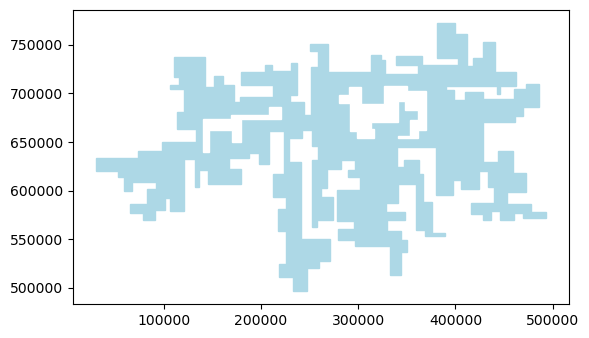

In [3]:
from pyvispoly import plot_polygon
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_aspect("equal")
plot_polygon(instance.as_cgal_polygon(), color="lightblue", ax=ax)
plt.show()

In [4]:
def plot_solution(ax, instance, objective, guards, witnesses, closest_pair, title=""):
    ax.set_aspect("equal")
    plt.title(title+"Objective: " + str(objective))
    plot_polygon(instance.as_cgal_polygon(), color="lightblue", ax=ax)
    for witness, covering_guards in witnesses:
        ax.plot([float(witness.x())], [float(witness.y())], "x", color="grey")
    for guard in guards:
        if guard not in closest_pair:
            ax.plot(
                [instance.positions[guard][0]],
                [instance.positions[guard][1]],
                "bo",
            )
        else:
            ax.plot(
                [instance.positions[guard][0]],
                [instance.positions[guard][1]],
                "ro",
            )

In [5]:
# Plotting the solution process
class MyObserbver(DispAgpSolverObserver):
    def __init__(
        self, instance, save_to: typing.Optional[str] = None, filetype="pdf"
    ) -> None:
        super().__init__()
        self.instance = instance
        if save_to is not None:
            os.makedirs(save_to, exist_ok=True)
        self._save_to = save_to
        self.filetype = filetype
        self.i = 0
        self.last_solution = None

    def _save(self, name):
        if self._save_to is not None:
            # up to 3 digits
            plt.savefig(
                os.path.join(self._save_to, f"{self.i:03d}_{name}.{self.filetype}")
            )
        self.i += 1

    def on_coverage_iteration(
        self,
        guards: List[int],
        witnesses: List[Tuple[Any, List[int]]],
        missing_areas: List,
    ):
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        plt.title("Adding " + str(len(witnesses)) + " witnesses")
        plot_polygon(self.instance.as_cgal_polygon(), color="lightblue", ax=ax)
        for area in missing_areas:
            plot_polygon(area, color="red", ax=ax, alpha=0.3)
        for guard in guards:
            ax.plot(
                [self.instance.positions[guard][0]],
                [self.instance.positions[guard][1]],
                "bo",
            )
        for witness, covering_guards in witnesses:
            for covering_guard in covering_guards:
                ax.plot(
                    [self.instance.positions[covering_guard][0], float(witness.x())],
                    [self.instance.positions[covering_guard][1], float(witness.y())],
                    "r--",
                    lw=0.5,
                )
            ax.plot([float(witness.x())], [float(witness.y())], "x", color="darkred")
        self._save("coverage_iteration")
        plt.show()

    def on_new_solution(
        self,
        guards: List[int],
        objective: float,
        closest_pair: Tuple[int, int],
        witnesses: List[Tuple[Any, List[int]]],
    ):
        self.last_solution = (objective, guards, witnesses, closest_pair)
        fig, ax = plt.subplots()
        plot_solution(ax, self.instance, objective, guards, witnesses, closest_pair)
        self._save("new_solution")
        plt.show()

    def plot_last_solution(self, show=True):
        if self.last_solution is not None:
            fig, ax = plt.subplots()
            plot_solution(ax, self.instance, *self.last_solution, title="OPTIMAL - ")
            self._save("last_solution")
            if show:
                plt.show()

2023-11-22 15:03:52,475 Test
2023-11-22 15:03:52,479 Building basic model...
2023-11-22 15:03:52,486 Building basic full coverage model...
2023-11-22 15:03:52,495 Computing visibility polygons for guards...
2023-11-22 15:03:53,040 Basic full coverage model built.
2023-11-22 15:03:53,041 Adding witnesses at vertices...
2023-11-22 15:03:53,043 Added coverage constraint for 9 vertices.
2023-11-22 15:03:53,046 Added coverage constraint for 18 vertices.
2023-11-22 15:03:53,049 Added coverage constraint for 11 vertices.
2023-11-22 15:03:53,051 Added coverage constraint for 5 vertices.
2023-11-22 15:03:53,053 Added coverage constraint for 17 vertices.
2023-11-22 15:03:53,057 Added coverage constraint for 27 vertices.
2023-11-22 15:03:53,060 Added coverage constraint for 29 vertices.
2023-11-22 15:03:53,063 Added coverage constraint for 29 vertices.
2023-11-22 15:03:53,066 Added coverage constraint for 12 vertices.
2023-11-22 15:03:53,070 Added coverage constraint for 7 vertices.
2023-11-22 15

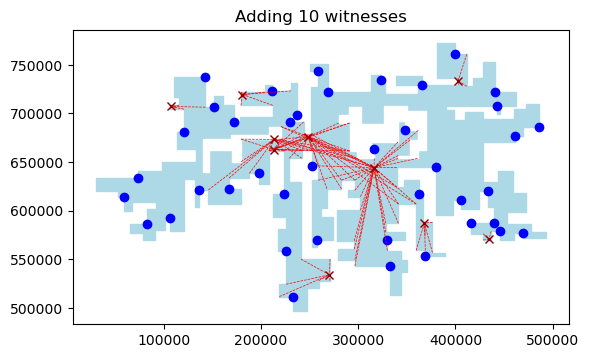

2023-11-22 15:03:56,273 Solving SAT-formula with timelimit 898.848325.
2023-11-22 15:03:56,274 SAT solver terminated (0.000000s).
2023-11-22 15:03:56,275 SAT-formula is satisfiable.
2023-11-22 15:03:56,276 Computing missing areas...
2023-11-22 15:03:56,741 Adding witnesses to missing areas...
2023-11-22 15:03:56,745 Added coverage constraint for 4 vertices.
2023-11-22 15:03:56,751 Added coverage constraint for 30 vertices.


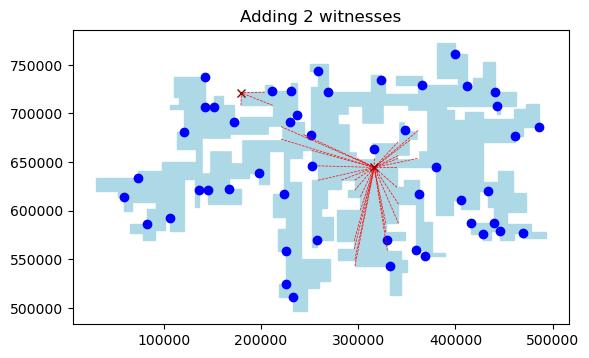

2023-11-22 15:03:57,333 Solving SAT-formula with timelimit 897.788560.
2023-11-22 15:03:57,335 SAT solver terminated (0.000000s).
2023-11-22 15:03:57,337 SAT-formula is satisfiable.
2023-11-22 15:03:57,337 Computing missing areas...


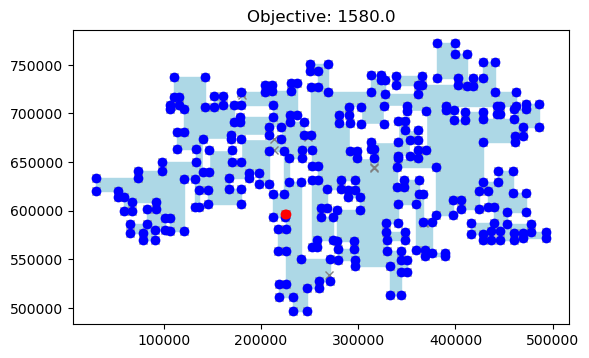

2023-11-22 15:03:59,647 Prohibited guard pair (190, 191).
2023-11-22 15:03:59,648 Prohibited guard pair (294, 295).
2023-11-22 15:03:59,649 Prohibited guard pair (189, 190).
2023-11-22 15:03:59,650 Prohibited guard pair (263, 264).
2023-11-22 15:03:59,651 Prohibited guard pair (64, 65).
2023-11-22 15:03:59,651 Prohibited guard pair (63, 66).
2023-11-22 15:03:59,652 Prohibited guard pair (170, 171).
2023-11-22 15:03:59,653 Prohibited guard pair (90, 91).
2023-11-22 15:03:59,654 Prohibited guard pair (283, 284).
2023-11-22 15:03:59,655 Prohibited guard pair (270, 271).
2023-11-22 15:03:59,656 Prohibited guard pair (0, 1).
2023-11-22 15:03:59,658 Prohibited guard pair (133, 134).
2023-11-22 15:03:59,659 Prohibited guard pair (218, 219).
2023-11-22 15:03:59,660 Prohibited guard pair (91, 92).
2023-11-22 15:03:59,661 Prohibited guard pair (189, 191).
2023-11-22 15:03:59,663 Prohibited guard pair (164, 165).
2023-11-22 15:03:59,664 Prohibited guard pair (179, 180).
2023-11-22 15:03:59,666 Pr

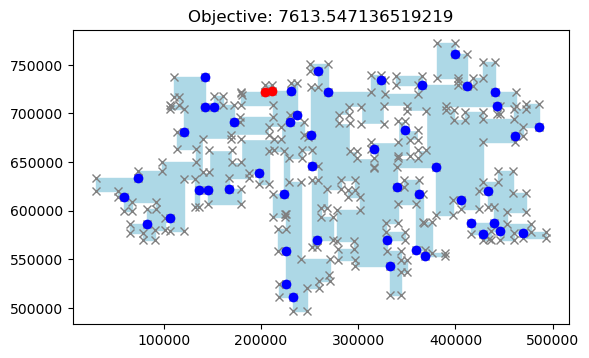

2023-11-22 15:04:01,402 Prohibited guard pair (98, 99).
2023-11-22 15:04:01,405 Prohibited guard pair (261, 265).
2023-11-22 15:04:01,406 Prohibited guard pair (311, 312).
2023-11-22 15:04:01,407 Prohibited guard pair (284, 285).
2023-11-22 15:04:01,409 Prohibited guard pair (253, 254).
2023-11-22 15:04:01,410 Prohibited guard pair (159, 160).
2023-11-22 15:04:01,411 Prohibited guard pair (109, 110).
2023-11-22 15:04:01,413 Prohibited guard pair (312, 313).
2023-11-22 15:04:01,414 Prohibited guard pair (4, 5).
2023-11-22 15:04:01,416 Prohibited guard pair (252, 255).
2023-11-22 15:04:01,417 Prohibited guard pair (46, 47).
2023-11-22 15:04:01,420 Prohibited guard pair (308, 309).
2023-11-22 15:04:01,422 Prohibited guard pair (57, 58).
2023-11-22 15:04:01,425 Prohibited guard pair (192, 193).
2023-11-22 15:04:01,427 Prohibited guard pair (194, 195).
2023-11-22 15:04:01,429 Prohibited guard pair (150, 151).
2023-11-22 15:04:01,435 Prohibited guard pair (102, 103).
2023-11-22 15:04:01,442 

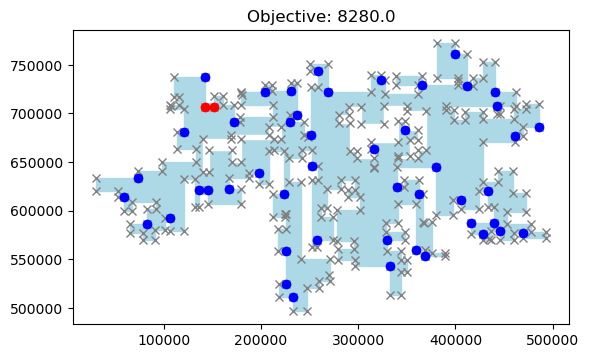

2023-11-22 15:04:03,291 Prohibited guard pair (291, 292).
2023-11-22 15:04:03,292 Prohibited guard pair (237, 238).
2023-11-22 15:04:03,292 Prohibited guard pair (218, 220).
2023-11-22 15:04:03,293 Prohibited guard pair (297, 298).
2023-11-22 15:04:03,294 Prohibited guard pair (296, 297).
2023-11-22 15:04:03,295 Prohibited guard pair (21, 24).
2023-11-22 15:04:03,296 Prohibited guard pair (65, 66).
2023-11-22 15:04:03,297 Prohibited guard pair (131, 132).
2023-11-22 15:04:03,299 Prohibited guard pair (283, 285).
2023-11-22 15:04:03,299 Prohibited guard pair (33, 34).
2023-11-22 15:04:03,300 Prohibited guard pair (29, 33).
2023-11-22 15:04:03,301 Prohibited guard pair (63, 64).
2023-11-22 15:04:03,302 Prohibited guard pair (25, 26).
2023-11-22 15:04:03,303 Prohibited guard pair (230, 233).
2023-11-22 15:04:03,304 Prohibited guard pair (11, 12).
2023-11-22 15:04:03,304 Prohibited guard pair (227, 228).
2023-11-22 15:04:03,305 Prohibited guard pair (23, 24).
2023-11-22 15:04:03,306 Prohib

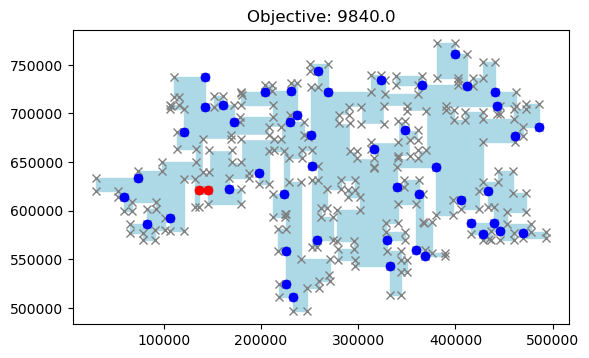

2023-11-22 15:04:05,104 Prohibited guard pair (290, 291).
2023-11-22 15:04:05,106 Prohibited guard pair (156, 159).
2023-11-22 15:04:05,107 Prohibited guard pair (14, 43).
2023-11-22 15:04:05,108 Prohibited guard pair (108, 110).
2023-11-22 15:04:05,109 Prohibited guard pair (124, 125).
2023-11-22 15:04:05,110 Prohibited guard pair (212, 213).
2023-11-22 15:04:05,110 Prohibited guard pair (59, 60).
2023-11-22 15:04:05,111 Prohibited guard pair (182, 183).
2023-11-22 15:04:05,113 Prohibited guard pair (180, 181).
2023-11-22 15:04:05,114 Prohibited guard pair (92, 93).
2023-11-22 15:04:05,116 Prohibited guard pair (123, 126).
2023-11-22 15:04:05,122 Prohibited guard pair (161, 162).
2023-11-22 15:04:05,125 Prohibited guard pair (72, 73).
2023-11-22 15:04:05,128 Prohibited guard pair (132, 134).
2023-11-22 15:04:05,137 Prohibited guard pair (229, 230).
2023-11-22 15:04:05,143 Prohibited guard pair (21, 23).
2023-11-22 15:04:05,144 Prohibited guard pair (162, 163).
2023-11-22 15:04:05,150 

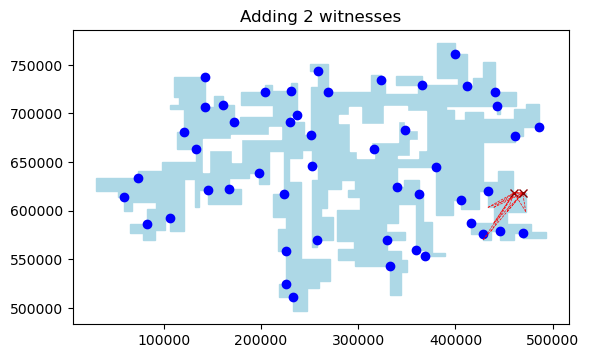

2023-11-22 15:04:06,174 Solving SAT-formula with timelimit 9.092059.
2023-11-22 15:04:06,175 SAT solver terminated (0.000000s).
2023-11-22 15:04:06,176 SAT-formula is satisfiable.
2023-11-22 15:04:06,177 Computing missing areas...


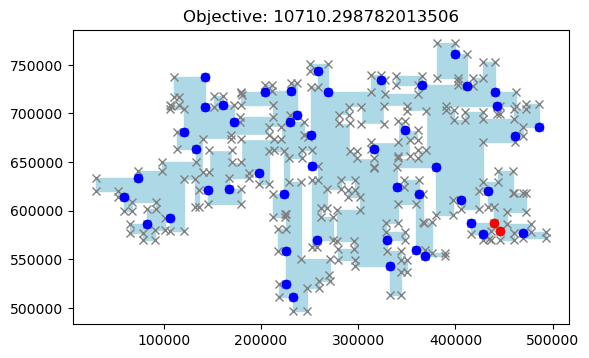

2023-11-22 15:04:07,698 Prohibited guard pair (30, 33).
2023-11-22 15:04:07,699 Prohibited guard pair (105, 281).
2023-11-22 15:04:07,700 Prohibited guard pair (311, 313).
2023-11-22 15:04:07,701 Prohibited guard pair (41, 42).
2023-11-22 15:04:07,702 Prohibited guard pair (84, 87).
2023-11-22 15:04:07,702 Prohibited guard pair (239, 240).
2023-11-22 15:04:07,703 Prohibited guard pair (244, 245).
2023-11-22 15:04:07,704 Prohibited guard pair (238, 241).
2023-11-22 15:04:07,704 Prohibited guard pair (19, 20).
2023-11-22 15:04:07,705 Prohibited guard pair (289, 292).
2023-11-22 15:04:07,705 Prohibited guard pair (309, 310).
2023-11-22 15:04:07,706 Prohibited guard pair (181, 182).
2023-11-22 15:04:07,707 Prohibited guard pair (168, 169).
2023-11-22 15:04:07,707 Prohibited guard pair (83, 88).
2023-11-22 15:04:07,708 Prohibited guard pair (91, 93).
2023-11-22 15:04:07,709 Prohibited guard pair (251, 252).
2023-11-22 15:04:07,709 Prohibited guard pair (186, 187).
2023-11-22 15:04:07,710 Pr

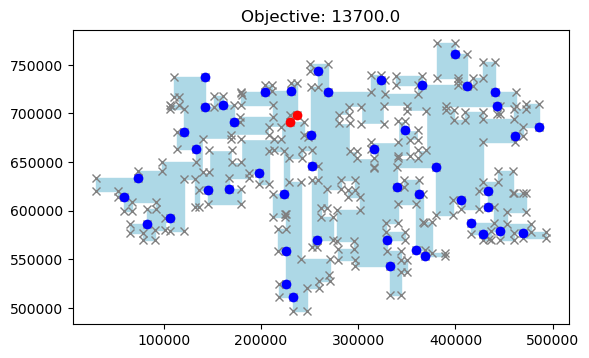

2023-11-22 15:04:09,297 Prohibited guard pair (131, 135).
2023-11-22 15:04:09,298 Prohibited guard pair (154, 164).
2023-11-22 15:04:09,299 Prohibited guard pair (15, 42).
2023-11-22 15:04:09,299 Prohibited guard pair (18, 35).
2023-11-22 15:04:09,300 Prohibited guard pair (286, 289).
2023-11-22 15:04:09,301 Prohibited guard pair (250, 251).
2023-11-22 15:04:09,302 Prohibited guard pair (188, 191).
2023-11-22 15:04:09,303 Prohibited guard pair (233, 234).
2023-11-22 15:04:09,303 Prohibited guard pair (123, 125).
2023-11-22 15:04:09,304 Prohibited guard pair (186, 209).
2023-11-22 15:04:09,305 Prohibited guard pair (50, 52).
2023-11-22 15:04:09,305 Prohibited guard pair (26, 27).
2023-11-22 15:04:09,306 Prohibited guard pair (286, 294).
2023-11-22 15:04:09,307 Prohibited guard pair (121, 270).
2023-11-22 15:04:09,307 Prohibited guard pair (89, 94).
2023-11-22 15:04:09,308 Prohibited guard pair (25, 28).
2023-11-22 15:04:09,308 Prohibited guard pair (196, 199).
2023-11-22 15:04:09,309 So

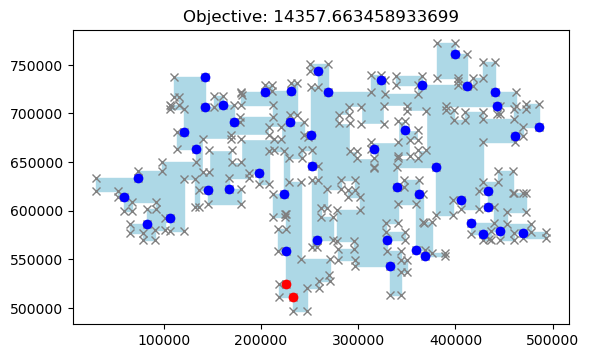

2023-11-22 15:04:10,817 Prohibited guard pair (202, 204).
2023-11-22 15:04:10,818 Prohibited guard pair (1, 2).
2023-11-22 15:04:10,819 Prohibited guard pair (231, 233).
2023-11-22 15:04:10,819 Prohibited guard pair (17, 36).
2023-11-22 15:04:10,820 Prohibited guard pair (67, 68).
2023-11-22 15:04:10,821 Prohibited guard pair (196, 198).
2023-11-22 15:04:10,822 Prohibited guard pair (63, 69).
2023-11-22 15:04:10,822 Solving SAT-formula with timelimit 15.700898.
2023-11-22 15:04:10,823 SAT solver terminated (0.000000s).
2023-11-22 15:04:10,824 SAT-formula is satisfiable.
2023-11-22 15:04:10,825 Computing missing areas...
2023-11-22 15:04:11,333 Adding witnesses to missing areas...
2023-11-22 15:04:11,339 Added coverage constraint for 16 vertices.
2023-11-22 15:04:11,342 Added coverage constraint for 14 vertices.


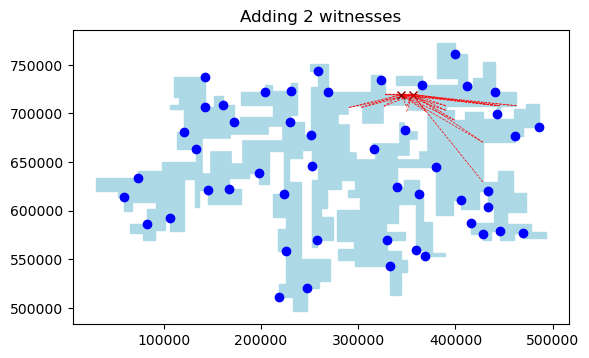

2023-11-22 15:04:11,789 Solving SAT-formula with timelimit 14.734261.
2023-11-22 15:04:11,790 SAT solver terminated (0.000000s).
2023-11-22 15:04:11,791 SAT-formula is satisfiable.
2023-11-22 15:04:11,791 Computing missing areas...
2023-11-22 15:04:12,352 Adding witnesses to missing areas...
2023-11-22 15:04:12,356 Added coverage constraint for 14 vertices.


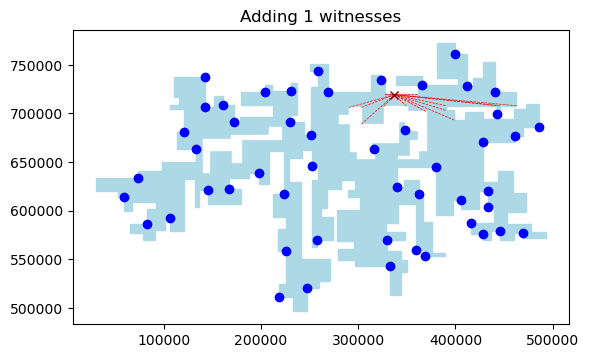

2023-11-22 15:04:12,783 Solving SAT-formula with timelimit 13.739704.
2023-11-22 15:04:12,785 SAT solver terminated (0.000000s).
2023-11-22 15:04:12,785 SAT-formula is satisfiable.
2023-11-22 15:04:12,786 Computing missing areas...


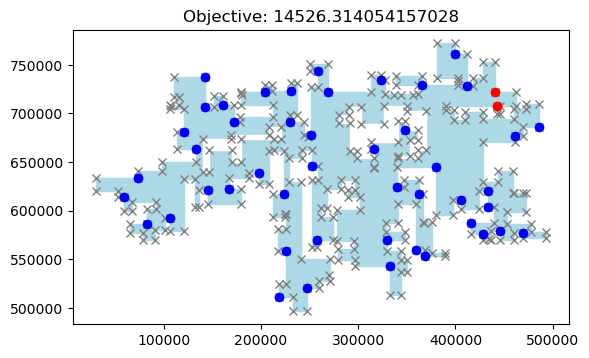

2023-11-22 15:04:14,211 Prohibited guard pair (134, 135).
2023-11-22 15:04:14,212 Prohibited guard pair (159, 161).
2023-11-22 15:04:14,213 Prohibited guard pair (149, 150).
2023-11-22 15:04:14,214 Prohibited guard pair (45, 47).
2023-11-22 15:04:14,214 Prohibited guard pair (28, 30).
2023-11-22 15:04:14,215 Prohibited guard pair (199, 200).
2023-11-22 15:04:14,215 Prohibited guard pair (173, 174).
2023-11-22 15:04:14,216 Prohibited guard pair (3, 5).
2023-11-22 15:04:14,217 Prohibited guard pair (180, 278).
2023-11-22 15:04:14,218 Prohibited guard pair (215, 216).
2023-11-22 15:04:14,219 Prohibited guard pair (179, 181).
2023-11-22 15:04:14,220 Prohibited guard pair (260, 262).
2023-11-22 15:04:14,220 Solving SAT-formula with timelimit 19.099051.
2023-11-22 15:04:14,221 SAT solver terminated (0.000000s).
2023-11-22 15:04:14,222 SAT-formula is satisfiable.
2023-11-22 15:04:14,223 Computing missing areas...


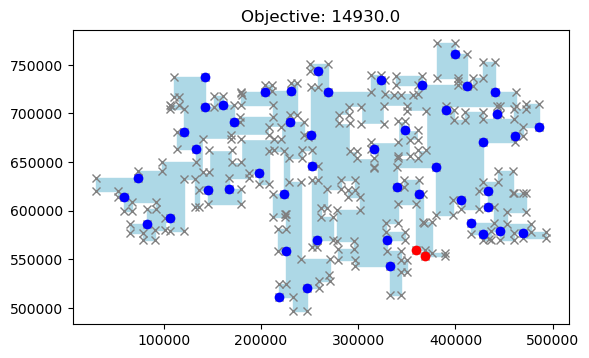

2023-11-22 15:04:15,713 Prohibited guard pair (226, 227).
2023-11-22 15:04:15,714 Prohibited guard pair (90, 93).
2023-11-22 15:04:15,715 Prohibited guard pair (111, 117).
2023-11-22 15:04:15,716 Prohibited guard pair (106, 281).
2023-11-22 15:04:15,716 Prohibited guard pair (89, 90).
2023-11-22 15:04:15,717 Prohibited guard pair (181, 183).
2023-11-22 15:04:15,718 Prohibited guard pair (200, 201).
2023-11-22 15:04:15,719 Prohibited guard pair (166, 167).
2023-11-22 15:04:15,720 Prohibited guard pair (133, 135).
2023-11-22 15:04:15,720 Prohibited guard pair (184, 185).
2023-11-22 15:04:15,721 Prohibited guard pair (293, 295).
2023-11-22 15:04:15,721 Prohibited guard pair (223, 225).
2023-11-22 15:04:15,722 Prohibited guard pair (9, 10).
2023-11-22 15:04:15,723 Prohibited guard pair (210, 212).
2023-11-22 15:04:15,723 Prohibited guard pair (175, 176).
2023-11-22 15:04:15,724 Prohibited guard pair (40, 41).
2023-11-22 15:04:15,725 Prohibited guard pair (66, 69).
2023-11-22 15:04:15,725 P

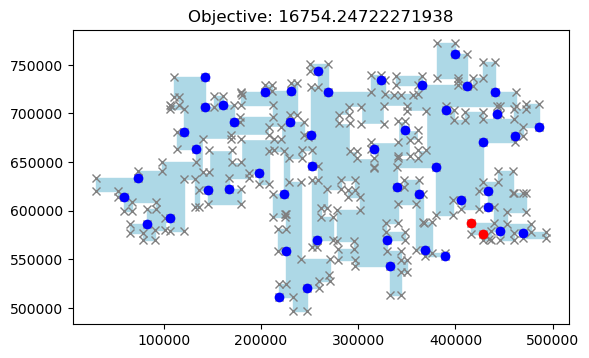

2023-11-22 15:04:17,276 Prohibited guard pair (46, 54).
2023-11-22 15:04:17,277 Prohibited guard pair (31, 33).
2023-11-22 15:04:17,278 Prohibited guard pair (66, 67).
2023-11-22 15:04:17,278 Prohibited guard pair (249, 251).
2023-11-22 15:04:17,279 Prohibited guard pair (240, 241).
2023-11-22 15:04:17,280 Prohibited guard pair (156, 157).
2023-11-22 15:04:17,281 Prohibited guard pair (2, 4).
2023-11-22 15:04:17,282 Prohibited guard pair (178, 277).
2023-11-22 15:04:17,282 Prohibited guard pair (286, 295).
2023-11-22 15:04:17,283 Prohibited guard pair (260, 265).
2023-11-22 15:04:17,284 Prohibited guard pair (120, 270).
2023-11-22 15:04:17,285 Prohibited guard pair (163, 165).
2023-11-22 15:04:17,285 Prohibited guard pair (213, 215).
2023-11-22 15:04:17,286 Prohibited guard pair (1, 4).
2023-11-22 15:04:17,286 Prohibited guard pair (184, 280).
2023-11-22 15:04:17,287 Prohibited guard pair (51, 53).
2023-11-22 15:04:17,288 Prohibited guard pair (15, 16).
2023-11-22 15:04:17,289 Solving 

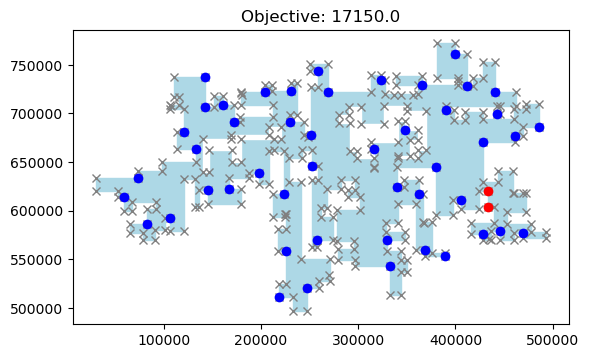

2023-11-22 15:04:18,736 Prohibited guard pair (304, 305).
2023-11-22 15:04:18,738 Prohibited guard pair (121, 122).
2023-11-22 15:04:18,740 Prohibited guard pair (93, 94).
2023-11-22 15:04:18,741 Prohibited guard pair (156, 160).
2023-11-22 15:04:18,743 Prohibited guard pair (154, 165).
2023-11-22 15:04:18,744 Prohibited guard pair (199, 202).
2023-11-22 15:04:18,745 Prohibited guard pair (252, 256).
2023-11-22 15:04:18,746 Prohibited guard pair (190, 192).
2023-11-22 15:04:18,747 Prohibited guard pair (229, 231).
2023-11-22 15:04:18,747 Prohibited guard pair (8, 9).
2023-11-22 15:04:18,748 Prohibited guard pair (217, 226).
2023-11-22 15:04:18,750 Prohibited guard pair (5, 258).
2023-11-22 15:04:18,751 Prohibited guard pair (238, 242).
2023-11-22 15:04:18,752 Prohibited guard pair (226, 228).
2023-11-22 15:04:18,753 Prohibited guard pair (30, 34).
2023-11-22 15:04:18,757 Prohibited guard pair (140, 169).
2023-11-22 15:04:18,764 Prohibited guard pair (195, 207).
2023-11-22 15:04:18,773 

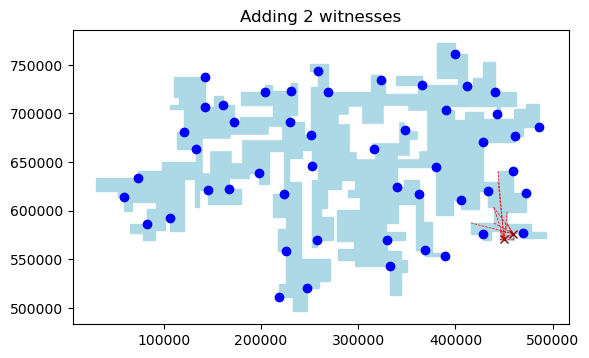

2023-11-22 15:04:19,834 Solving SAT-formula with timelimit 22.613107.
2023-11-22 15:04:19,835 SAT solver terminated (0.000000s).
2023-11-22 15:04:19,836 SAT-formula is satisfiable.
2023-11-22 15:04:19,837 Computing missing areas...


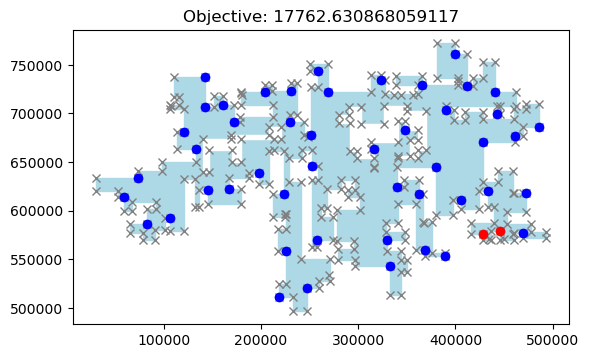

2023-11-22 15:04:21,404 Prohibited guard pair (18, 23).
2023-11-22 15:04:21,405 Prohibited guard pair (27, 35).
2023-11-22 15:04:21,406 Prohibited guard pair (252, 253).
2023-11-22 15:04:21,407 Prohibited guard pair (10, 12).
2023-11-22 15:04:21,408 Prohibited guard pair (78, 79).
2023-11-22 15:04:21,409 Prohibited guard pair (24, 26).
2023-11-22 15:04:21,410 Prohibited guard pair (26, 35).
2023-11-22 15:04:21,411 Prohibited guard pair (229, 233).
2023-11-22 15:04:21,412 Prohibited guard pair (28, 33).
2023-11-22 15:04:21,413 Prohibited guard pair (18, 36).
2023-11-22 15:04:21,414 Prohibited guard pair (211, 213).
2023-11-22 15:04:21,415 Prohibited guard pair (282, 285).
2023-11-22 15:04:21,417 Prohibited guard pair (154, 156).
2023-11-22 15:04:21,418 Prohibited guard pair (236, 237).
2023-11-22 15:04:21,419 Prohibited guard pair (23, 25).
2023-11-22 15:04:21,420 Prohibited guard pair (121, 271).
2023-11-22 15:04:21,421 Prohibited guard pair (170, 172).
2023-11-22 15:04:21,423 Prohibit

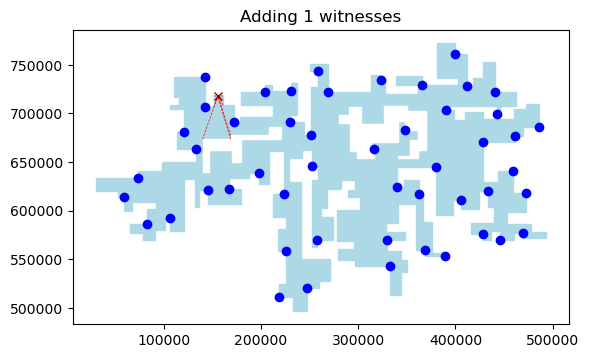

2023-11-22 15:04:22,472 Solving SAT-formula with timelimit 25.354116.
2023-11-22 15:04:22,473 SAT solver terminated (0.000000s).
2023-11-22 15:04:22,474 SAT-formula is satisfiable.
2023-11-22 15:04:22,475 Computing missing areas...


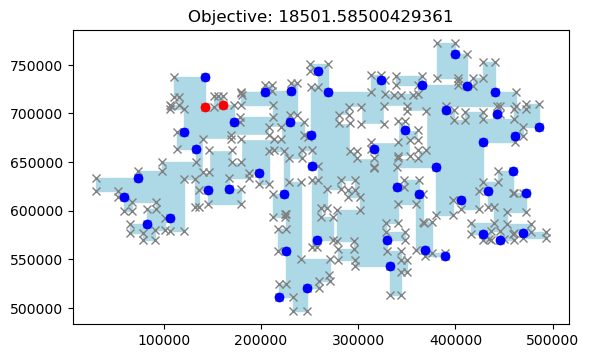

2023-11-22 15:04:23,910 Prohibited guard pair (185, 212).
2023-11-22 15:04:23,911 Prohibited guard pair (96, 97).
2023-11-22 15:04:23,912 Prohibited guard pair (197, 199).
2023-11-22 15:04:23,913 Prohibited guard pair (130, 135).
2023-11-22 15:04:23,913 Prohibited guard pair (74, 81).
2023-11-22 15:04:23,914 Prohibited guard pair (286, 293).
2023-11-22 15:04:23,915 Prohibited guard pair (94, 305).
2023-11-22 15:04:23,916 Prohibited guard pair (156, 161).
2023-11-22 15:04:23,916 Prohibited guard pair (173, 274).
2023-11-22 15:04:23,918 Prohibited guard pair (179, 278).
2023-11-22 15:04:23,918 Prohibited guard pair (47, 54).
2023-11-22 15:04:23,920 Prohibited guard pair (105, 118).
2023-11-22 15:04:23,921 Prohibited guard pair (45, 48).
2023-11-22 15:04:23,921 Prohibited guard pair (40, 42).
2023-11-22 15:04:23,922 Prohibited guard pair (251, 255).
2023-11-22 15:04:23,927 Prohibited guard pair (103, 105).
2023-11-22 15:04:23,936 Prohibited guard pair (90, 94).
2023-11-22 15:04:23,945 Pro

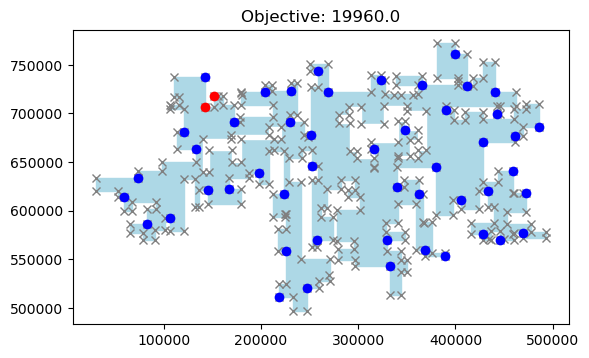

2023-11-22 15:04:25,554 Prohibited guard pair (229, 232).
2023-11-22 15:04:25,554 Prohibited guard pair (96, 98).
2023-11-22 15:04:25,555 Prohibited guard pair (48, 53).
2023-11-22 15:04:25,556 Prohibited guard pair (186, 190).
2023-11-22 15:04:25,557 Prohibited guard pair (92, 94).
2023-11-22 15:04:25,557 Prohibited guard pair (84, 88).
2023-11-22 15:04:25,558 Prohibited guard pair (259, 267).
2023-11-22 15:04:25,559 Prohibited guard pair (185, 211).
2023-11-22 15:04:25,559 Prohibited guard pair (168, 273).
2023-11-22 15:04:25,560 Prohibited guard pair (186, 191).
2023-11-22 15:04:25,561 Prohibited guard pair (262, 264).
2023-11-22 15:04:25,562 Prohibited guard pair (292, 294).
2023-11-22 15:04:25,563 Prohibited guard pair (104, 106).
2023-11-22 15:04:25,564 Prohibited guard pair (11, 13).
2023-11-22 15:04:25,564 Prohibited guard pair (72, 75).
2023-11-22 15:04:25,565 Prohibited guard pair (121, 123).
2023-11-22 15:04:25,566 Prohibited guard pair (189, 192).
2023-11-22 15:04:25,567 Pr

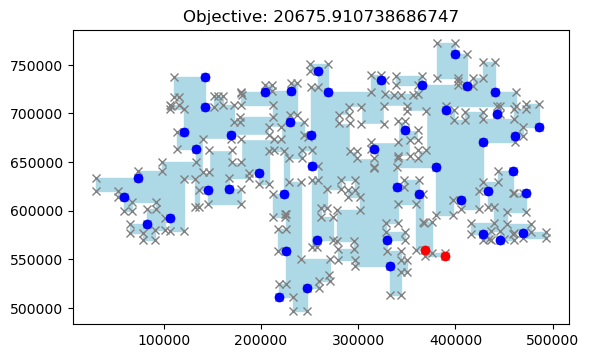

2023-11-22 15:04:27,029 Prohibited guard pair (161, 163).
2023-11-22 15:04:27,030 Prohibited guard pair (122, 126).
2023-11-22 15:04:27,031 Prohibited guard pair (158, 160).
2023-11-22 15:04:27,031 Prohibited guard pair (286, 291).
2023-11-22 15:04:27,032 Prohibited guard pair (88, 300).
2023-11-22 15:04:27,033 Prohibited guard pair (7, 296).
2023-11-22 15:04:27,034 Prohibited guard pair (56, 58).
2023-11-22 15:04:27,035 Prohibited guard pair (178, 278).
2023-11-22 15:04:27,036 Prohibited guard pair (162, 165).
2023-11-22 15:04:27,036 Prohibited guard pair (253, 255).
2023-11-22 15:04:27,037 Prohibited guard pair (106, 117).
2023-11-22 15:04:27,037 Prohibited guard pair (305, 307).
2023-11-22 15:04:27,038 Prohibited guard pair (178, 179).
2023-11-22 15:04:27,039 Prohibited guard pair (20, 24).
2023-11-22 15:04:27,039 Prohibited guard pair (222, 224).
2023-11-22 15:04:27,040 Prohibited guard pair (276, 278).
2023-11-22 15:04:27,041 Prohibited guard pair (120, 271).
2023-11-22 15:04:27,0

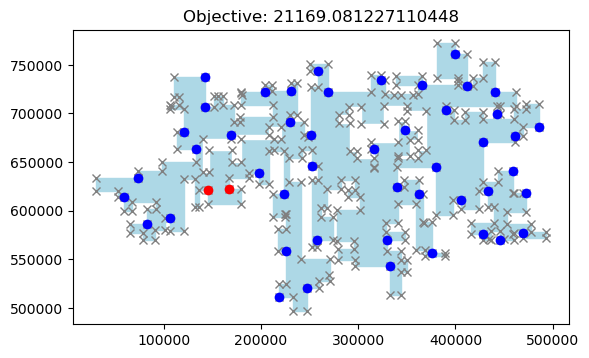

2023-11-22 15:04:28,498 Prohibited guard pair (286, 287).
2023-11-22 15:04:28,499 Prohibited guard pair (306, 309).
2023-11-22 15:04:28,500 Prohibited guard pair (77, 79).
2023-11-22 15:04:28,501 Prohibited guard pair (129, 131).
2023-11-22 15:04:28,502 Prohibited guard pair (148, 150).
2023-11-22 15:04:28,502 Prohibited guard pair (27, 30).
2023-11-22 15:04:28,503 Prohibited guard pair (22, 25).
2023-11-22 15:04:28,504 Prohibited guard pair (62, 299).
2023-11-22 15:04:28,505 Prohibited guard pair (180, 182).
2023-11-22 15:04:28,506 Prohibited guard pair (210, 280).
2023-11-22 15:04:28,506 Prohibited guard pair (178, 180).
2023-11-22 15:04:28,507 Prohibited guard pair (80, 81).
2023-11-22 15:04:28,508 Prohibited guard pair (25, 36).
2023-11-22 15:04:28,509 Prohibited guard pair (214, 216).
2023-11-22 15:04:28,509 Prohibited guard pair (180, 277).
2023-11-22 15:04:28,510 Prohibited guard pair (14, 42).
2023-11-22 15:04:28,510 Prohibited guard pair (172, 274).
2023-11-22 15:04:28,512 Pro

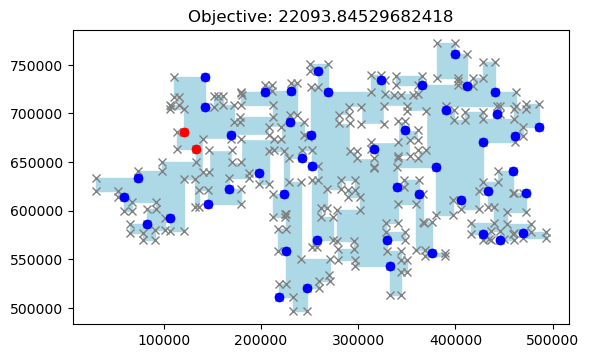

2023-11-22 15:04:30,120 Prohibited guard pair (196, 202).
2023-11-22 15:04:30,121 Prohibited guard pair (107, 281).
2023-11-22 15:04:30,121 Prohibited guard pair (127, 135).
2023-11-22 15:04:30,122 Prohibited guard pair (39, 40).
2023-11-22 15:04:30,123 Prohibited guard pair (119, 270).
2023-11-22 15:04:30,123 Prohibited guard pair (154, 162).
2023-11-22 15:04:30,124 Prohibited guard pair (193, 194).
2023-11-22 15:04:30,125 Prohibited guard pair (192, 195).
2023-11-22 15:04:30,126 Prohibited guard pair (49, 52).
2023-11-22 15:04:30,126 Prohibited guard pair (181, 278).
2023-11-22 15:04:30,127 Prohibited guard pair (66, 68).
2023-11-22 15:04:30,128 Prohibited guard pair (255, 257).
2023-11-22 15:04:30,128 Prohibited guard pair (86, 87).
2023-11-22 15:04:30,129 Prohibited guard pair (286, 288).
2023-11-22 15:04:30,130 Prohibited guard pair (229, 313).
2023-11-22 15:04:30,130 Prohibited guard pair (227, 229).
2023-11-22 15:04:30,131 Prohibited guard pair (19, 24).
2023-11-22 15:04:30,132 

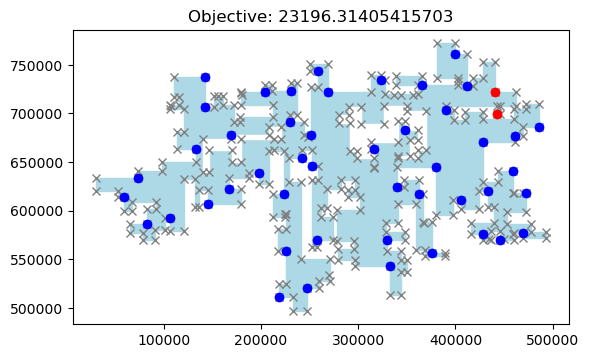

2023-11-22 15:04:31,686 Prohibited guard pair (69, 74).
2023-11-22 15:04:31,687 Prohibited guard pair (6, 296).
2023-11-22 15:04:31,687 Prohibited guard pair (275, 276).
2023-11-22 15:04:31,688 Prohibited guard pair (18, 28).
2023-11-22 15:04:31,689 Prohibited guard pair (49, 50).
2023-11-22 15:04:31,689 Prohibited guard pair (148, 151).
2023-11-22 15:04:31,690 Prohibited guard pair (247, 250).
2023-11-22 15:04:31,690 Prohibited guard pair (187, 190).
2023-11-22 15:04:31,691 Prohibited guard pair (301, 302).
2023-11-22 15:04:31,692 Prohibited guard pair (240, 242).
2023-11-22 15:04:31,692 Prohibited guard pair (37, 39).
2023-11-22 15:04:31,693 Prohibited guard pair (117, 281).
2023-11-22 15:04:31,694 Prohibited guard pair (219, 221).
2023-11-22 15:04:31,694 Prohibited guard pair (24, 28).
2023-11-22 15:04:31,695 Prohibited guard pair (44, 55).
2023-11-22 15:04:31,696 Prohibited guard pair (45, 54).
2023-11-22 15:04:31,696 Prohibited guard pair (18, 19).
2023-11-22 15:04:31,697 Prohibit

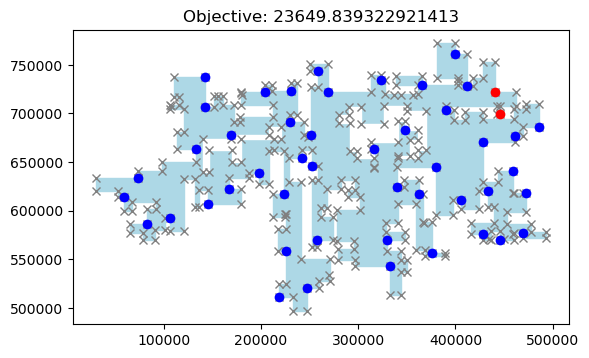

2023-11-22 15:04:33,204 Prohibited guard pair (124, 127).
2023-11-22 15:04:33,205 Prohibited guard pair (147, 150).
2023-11-22 15:04:33,205 Prohibited guard pair (155, 162).
2023-11-22 15:04:33,206 Prohibited guard pair (245, 246).
2023-11-22 15:04:33,207 Prohibited guard pair (1, 258).
2023-11-22 15:04:33,207 Prohibited guard pair (103, 280).
2023-11-22 15:04:33,208 Prohibited guard pair (286, 290).
2023-11-22 15:04:33,209 Prohibited guard pair (139, 273).
2023-11-22 15:04:33,209 Prohibited guard pair (104, 281).
2023-11-22 15:04:33,210 Prohibited guard pair (221, 222).
2023-11-22 15:04:33,211 Prohibited guard pair (58, 61).
2023-11-22 15:04:33,212 Prohibited guard pair (130, 134).
2023-11-22 15:04:33,212 Prohibited guard pair (216, 228).
2023-11-22 15:04:33,213 Prohibited guard pair (228, 230).
2023-11-22 15:04:33,214 Prohibited guard pair (89, 93).
2023-11-22 15:04:33,214 Prohibited guard pair (98, 100).
2023-11-22 15:04:33,215 Prohibited guard pair (30, 31).
2023-11-22 15:04:33,216

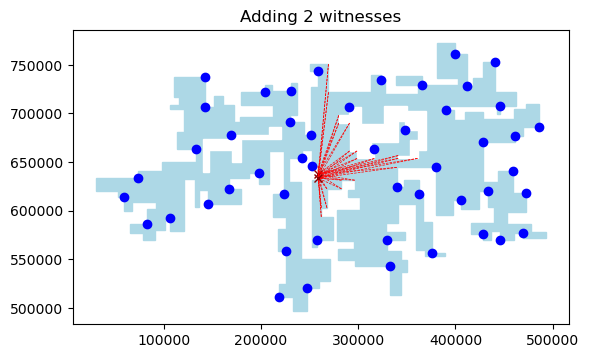

2023-11-22 15:04:34,368 Solving SAT-formula with timelimit 36.988131.
2023-11-22 15:04:34,369 SAT solver terminated (0.000000s).
2023-11-22 15:04:34,370 SAT-formula is satisfiable.
2023-11-22 15:04:34,371 Computing missing areas...


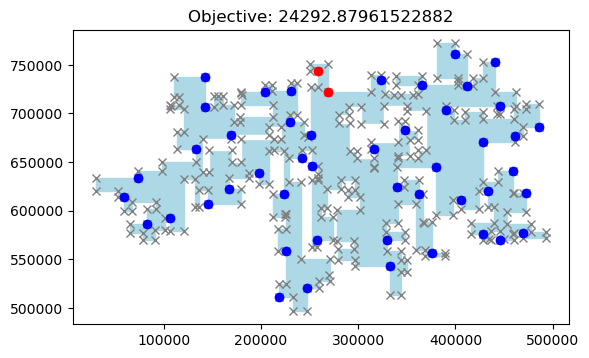

2023-11-22 15:04:35,783 Prohibited guard pair (156, 165).
2023-11-22 15:04:35,784 Solving SAT-formula with timelimit 40.662172.
2023-11-22 15:04:35,785 SAT solver terminated (0.000000s).
2023-11-22 15:04:35,786 SAT-formula is satisfiable.
2023-11-22 15:04:35,787 Computing missing areas...


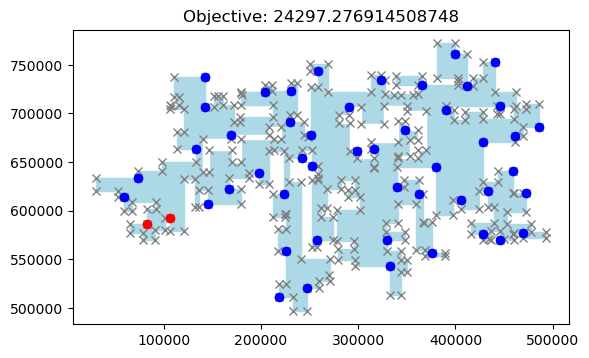

2023-11-22 15:04:37,315 Prohibited guard pair (144, 149).
2023-11-22 15:04:37,316 Solving SAT-formula with timelimit 42.195012.
2023-11-22 15:04:37,318 SAT solver terminated (0.000000s).
2023-11-22 15:04:37,319 SAT-formula is satisfiable.
2023-11-22 15:04:37,320 Computing missing areas...
2023-11-22 15:04:37,900 Adding witnesses to missing areas...
2023-11-22 15:04:37,904 Added coverage constraint for 12 vertices.


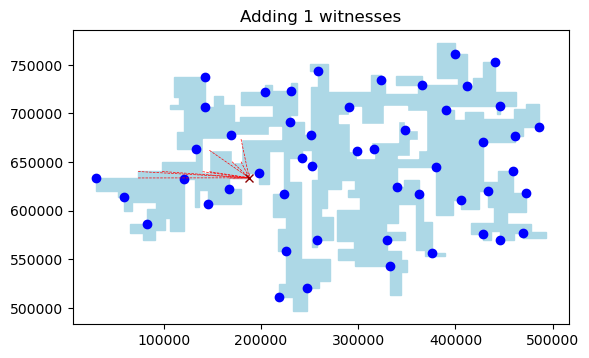

2023-11-22 15:04:38,327 Solving SAT-formula with timelimit 41.183977.
2023-11-22 15:04:38,330 SAT solver terminated (0.000000s).
2023-11-22 15:04:38,331 SAT-formula is satisfiable.
2023-11-22 15:04:38,332 Computing missing areas...


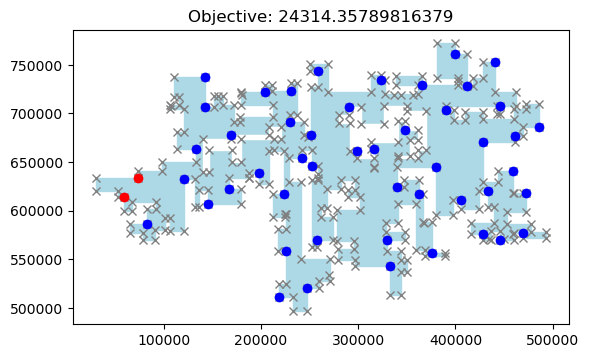

2023-11-22 15:04:40,382 Prohibited guard pair (9, 11).
2023-11-22 15:04:40,383 Prohibited guard pair (1, 5).
2023-11-22 15:04:40,383 Solving SAT-formula with timelimit 45.262086.
2023-11-22 15:04:40,385 SAT solver terminated (0.000000s).
2023-11-22 15:04:40,386 SAT-formula is satisfiable.
2023-11-22 15:04:40,387 Computing missing areas...


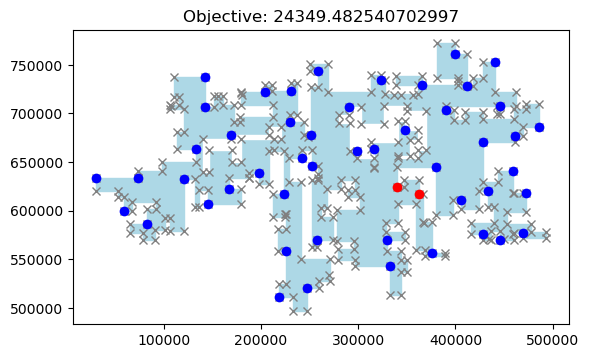

2023-11-22 15:04:42,394 Prohibited guard pair (114, 115).
2023-11-22 15:04:42,399 Prohibited guard pair (291, 293).
2023-11-22 15:04:42,407 Prohibited guard pair (103, 211).
2023-11-22 15:04:42,409 Prohibited guard pair (234, 235).
2023-11-22 15:04:42,410 Prohibited guard pair (85, 87).
2023-11-22 15:04:42,411 Prohibited guard pair (212, 280).
2023-11-22 15:04:42,412 Prohibited guard pair (173, 178).
2023-11-22 15:04:42,413 Prohibited guard pair (179, 277).
2023-11-22 15:04:42,415 Prohibited guard pair (28, 36).
2023-11-22 15:04:42,416 Prohibited guard pair (6, 293).
2023-11-22 15:04:42,418 Prohibited guard pair (282, 295).
2023-11-22 15:04:42,419 Prohibited guard pair (2, 259).
2023-11-22 15:04:42,421 Prohibited guard pair (73, 82).
2023-11-22 15:04:42,423 Prohibited guard pair (122, 125).
2023-11-22 15:04:42,425 Prohibited guard pair (142, 143).
2023-11-22 15:04:42,426 Prohibited guard pair (172, 174).
2023-11-22 15:04:42,428 Prohibited guard pair (27, 33).
2023-11-22 15:04:42,430 Pr

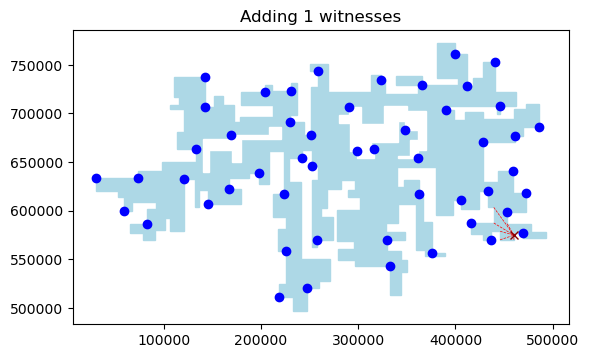

2023-11-22 15:04:43,758 Solving SAT-formula with timelimit 46.042271.
2023-11-22 15:04:43,760 SAT solver terminated (0.000000s).
2023-11-22 15:04:43,760 SAT-formula is satisfiable.
2023-11-22 15:04:43,761 Computing missing areas...


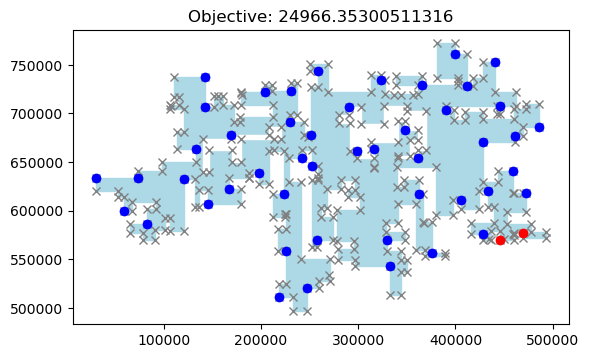

2023-11-22 15:04:45,729 Prohibited guard pair (250, 252).
2023-11-22 15:04:45,731 Prohibited guard pair (62, 82).
2023-11-22 15:04:45,732 Prohibited guard pair (185, 281).
2023-11-22 15:04:45,734 Prohibited guard pair (187, 209).
2023-11-22 15:04:45,735 Prohibited guard pair (0, 3).
2023-11-22 15:04:45,735 Prohibited guard pair (106, 268).
2023-11-22 15:04:45,736 Prohibited guard pair (190, 193).
2023-11-22 15:04:45,737 Prohibited guard pair (180, 183).
2023-11-22 15:04:45,738 Prohibited guard pair (89, 301).
2023-11-22 15:04:45,738 Prohibited guard pair (287, 290).
2023-11-22 15:04:45,739 Prohibited guard pair (155, 165).
2023-11-22 15:04:45,739 Prohibited guard pair (106, 110).
2023-11-22 15:04:45,740 Prohibited guard pair (215, 226).
2023-11-22 15:04:45,741 Prohibited guard pair (3, 258).
2023-11-22 15:04:45,741 Prohibited guard pair (210, 213).
2023-11-22 15:04:45,743 Prohibited guard pair (283, 294).
2023-11-22 15:04:45,744 Prohibited guard pair (107, 118).
2023-11-22 15:04:45,744

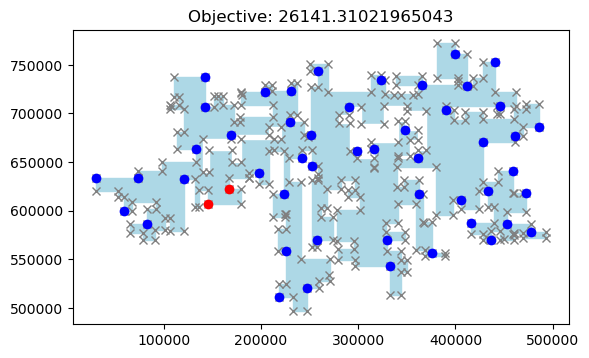

2023-11-22 15:04:47,541 Prohibited guard pair (244, 246).
2023-11-22 15:04:47,542 Prohibited guard pair (157, 162).
2023-11-22 15:04:47,543 Prohibited guard pair (64, 67).
2023-11-22 15:04:47,543 Prohibited guard pair (283, 295).
2023-11-22 15:04:47,544 Prohibited guard pair (106, 280).
2023-11-22 15:04:47,545 Prohibited guard pair (95, 306).
2023-11-22 15:04:47,546 Prohibited guard pair (33, 35).
2023-11-22 15:04:47,546 Solving SAT-formula with timelimit 52.424988.
2023-11-22 15:04:47,548 SAT solver terminated (0.000000s).
2023-11-22 15:04:47,548 SAT-formula is satisfiable.
2023-11-22 15:04:47,549 Computing missing areas...


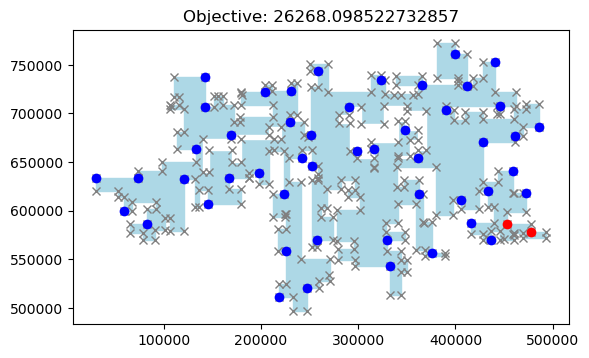

2023-11-22 15:04:49,626 Prohibited guard pair (6, 286).
2023-11-22 15:04:49,626 Prohibited guard pair (87, 301).
2023-11-22 15:04:49,627 Prohibited guard pair (103, 185).
2023-11-22 15:04:49,628 Prohibited guard pair (5, 259).
2023-11-22 15:04:49,629 Prohibited guard pair (289, 293).
2023-11-22 15:04:49,629 Prohibited guard pair (14, 16).
2023-11-22 15:04:49,630 Prohibited guard pair (67, 69).
2023-11-22 15:04:49,631 Prohibited guard pair (160, 163).
2023-11-22 15:04:49,633 Prohibited guard pair (221, 223).
2023-11-22 15:04:49,634 Prohibited guard pair (236, 238).
2023-11-22 15:04:49,634 Prohibited guard pair (21, 26).
2023-11-22 15:04:49,635 Prohibited guard pair (71, 73).
2023-11-22 15:04:49,636 Prohibited guard pair (161, 164).
2023-11-22 15:04:49,637 Prohibited guard pair (41, 43).
2023-11-22 15:04:49,638 Prohibited guard pair (239, 242).
2023-11-22 15:04:49,639 Prohibited guard pair (17, 42).
2023-11-22 15:04:49,640 Prohibited guard pair (49, 51).
2023-11-22 15:04:49,641 Prohibite

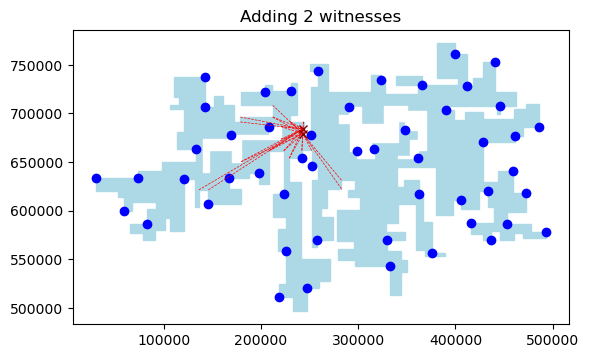

2023-11-22 15:04:50,857 Solving SAT-formula with timelimit 53.317420.
2023-11-22 15:04:50,858 SAT solver terminated (0.000000s).
2023-11-22 15:04:50,859 SAT-formula is satisfiable.
2023-11-22 15:04:50,860 Computing missing areas...


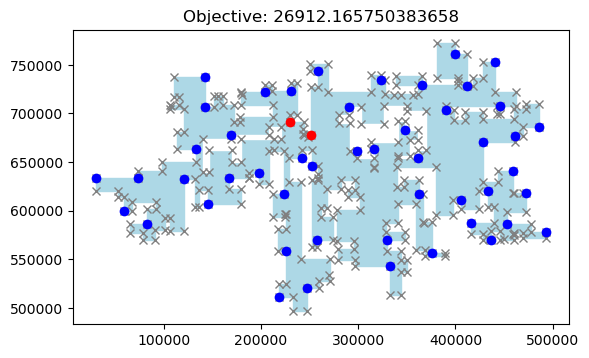

2023-11-22 15:04:52,402 Prohibited guard pair (97, 100).
2023-11-22 15:04:52,403 Prohibited guard pair (39, 41).
2023-11-22 15:04:52,404 Prohibited guard pair (111, 118).
2023-11-22 15:04:52,405 Prohibited guard pair (102, 211).
2023-11-22 15:04:52,405 Solving SAT-formula with timelimit 57.283822.
2023-11-22 15:04:52,407 SAT solver terminated (0.000000s).
2023-11-22 15:04:52,408 SAT-formula is satisfiable.
2023-11-22 15:04:52,408 Computing missing areas...
2023-11-22 15:04:53,172 Adding witnesses to missing areas...
2023-11-22 15:04:53,177 Added coverage constraint for 7 vertices.
2023-11-22 15:04:53,182 Added coverage constraint for 8 vertices.
2023-11-22 15:04:53,186 Added coverage constraint for 8 vertices.


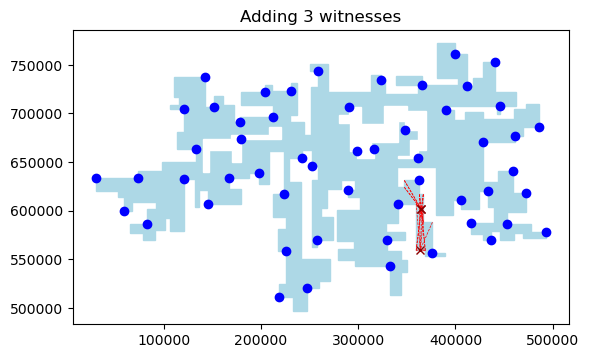

2023-11-22 15:04:53,654 Solving SAT-formula with timelimit 56.034548.
2023-11-22 15:04:53,656 SAT solver terminated (0.000000s).
2023-11-22 15:04:53,658 SAT-formula is satisfiable.
2023-11-22 15:04:53,659 Computing missing areas...


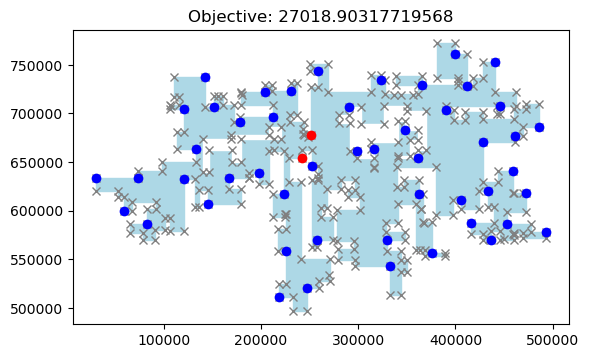

2023-11-22 15:04:55,552 Prohibited guard pair (243, 252).
2023-11-22 15:04:55,553 Solving SAT-formula with timelimit 60.431410.
2023-11-22 15:04:55,554 SAT solver terminated (0.000000s).
2023-11-22 15:04:55,555 SAT-formula is satisfiable.
2023-11-22 15:04:55,556 Computing missing areas...


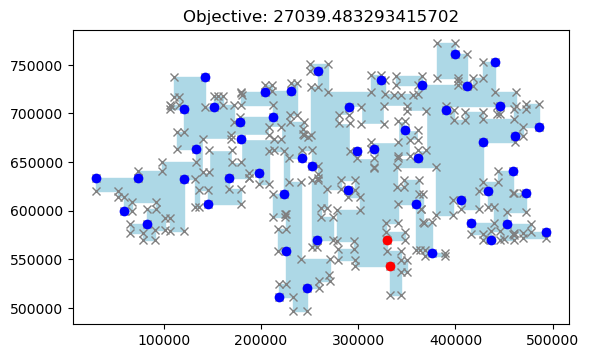

2023-11-22 15:04:57,311 Prohibited guard pair (137, 139).
2023-11-22 15:04:57,313 Prohibited guard pair (177, 274).
2023-11-22 15:04:57,314 Prohibited guard pair (23, 35).
2023-11-22 15:04:57,316 Solving SAT-formula with timelimit 62.194431.
2023-11-22 15:04:57,318 SAT solver terminated (0.000000s).
2023-11-22 15:04:57,319 SAT-formula is satisfiable.
2023-11-22 15:04:57,321 Computing missing areas...


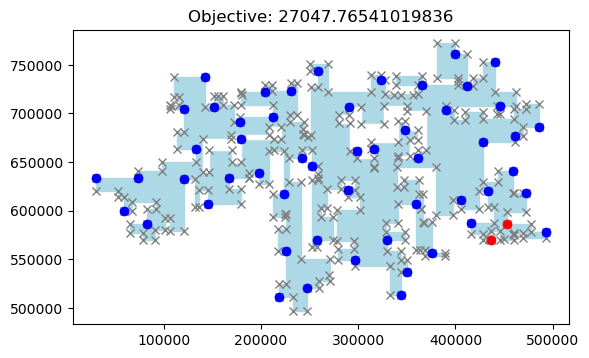

2023-11-22 15:04:59,135 Prohibited guard pair (27, 34).
2023-11-22 15:04:59,137 Prohibited guard pair (19, 23).
2023-11-22 15:04:59,139 Prohibited guard pair (212, 215).
2023-11-22 15:04:59,140 Prohibited guard pair (3, 259).
2023-11-22 15:04:59,141 Prohibited guard pair (127, 132).
2023-11-22 15:04:59,142 Prohibited guard pair (283, 313).
2023-11-22 15:04:59,143 Prohibited guard pair (36, 38).
2023-11-22 15:04:59,144 Prohibited guard pair (120, 123).
2023-11-22 15:04:59,146 Prohibited guard pair (84, 85).
2023-11-22 15:04:59,147 Prohibited guard pair (83, 86).
2023-11-22 15:04:59,148 Prohibited guard pair (90, 302).
2023-11-22 15:04:59,149 Prohibited guard pair (110, 114).
2023-11-22 15:04:59,150 Solving SAT-formula with timelimit 64.028297.
2023-11-22 15:04:59,153 SAT solver terminated (0.000000s).
2023-11-22 15:04:59,163 SAT-formula is satisfiable.
2023-11-22 15:04:59,169 Computing missing areas...


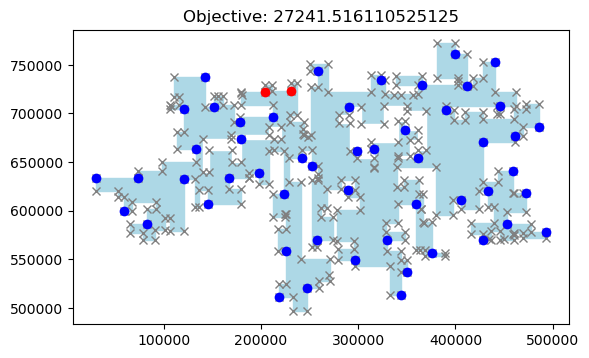

2023-11-22 15:05:00,820 Prohibited guard pair (46, 53).
2023-11-22 15:05:00,821 Prohibited guard pair (159, 164).
2023-11-22 15:05:00,822 Prohibited guard pair (91, 302).
2023-11-22 15:05:00,822 Prohibited guard pair (104, 107).
2023-11-22 15:05:00,823 Prohibited guard pair (107, 117).
2023-11-22 15:05:00,825 Prohibited guard pair (214, 217).
2023-11-22 15:05:00,826 Prohibited guard pair (14, 17).
2023-11-22 15:05:00,827 Prohibited guard pair (109, 111).
2023-11-22 15:05:00,828 Prohibited guard pair (0, 258).
2023-11-22 15:05:00,830 Prohibited guard pair (228, 313).
2023-11-22 15:05:00,831 Prohibited guard pair (13, 15).
2023-11-22 15:05:00,831 Prohibited guard pair (171, 173).
2023-11-22 15:05:00,832 Prohibited guard pair (158, 161).
2023-11-22 15:05:00,833 Prohibited guard pair (200, 202).
2023-11-22 15:05:00,834 Prohibited guard pair (16, 43).
2023-11-22 15:05:00,835 Prohibited guard pair (47, 52).
2023-11-22 15:05:00,835 Prohibited guard pair (83, 299).
2023-11-22 15:05:00,837 Proh

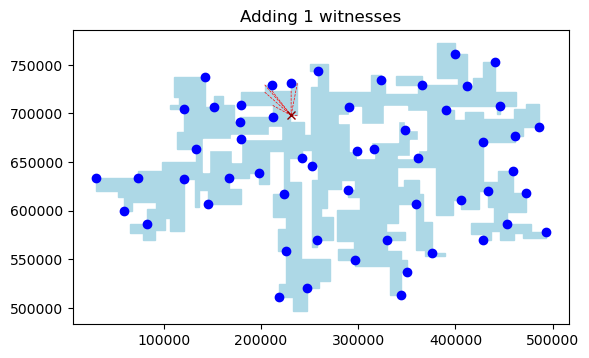

2023-11-22 15:05:02,005 Solving SAT-formula with timelimit 64.586656.
2023-11-22 15:05:02,007 SAT solver terminated (0.000000s).
2023-11-22 15:05:02,008 SAT-formula is satisfiable.
2023-11-22 15:05:02,010 Computing missing areas...


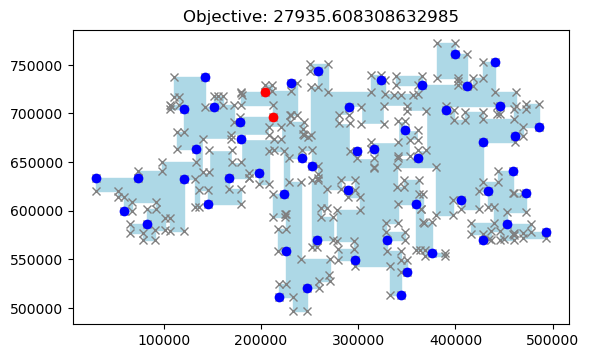

2023-11-22 15:05:04,202 Prohibited guard pair (178, 273).
2023-11-22 15:05:04,203 Prohibited guard pair (170, 173).
2023-11-22 15:05:04,203 Prohibited guard pair (237, 240).
2023-11-22 15:05:04,204 Prohibited guard pair (249, 252).
2023-11-22 15:05:04,205 Prohibited guard pair (80, 82).
2023-11-22 15:05:04,206 Prohibited guard pair (189, 193).
2023-11-22 15:05:04,206 Prohibited guard pair (215, 228).
2023-11-22 15:05:04,207 Prohibited guard pair (4, 6).
2023-11-22 15:05:04,208 Prohibited guard pair (16, 42).
2023-11-22 15:05:04,209 Prohibited guard pair (13, 43).
2023-11-22 15:05:04,209 Prohibited guard pair (198, 200).
2023-11-22 15:05:04,210 Prohibited guard pair (231, 234).
2023-11-22 15:05:04,211 Prohibited guard pair (87, 299).
2023-11-22 15:05:04,211 Prohibited guard pair (251, 256).
2023-11-22 15:05:04,212 Prohibited guard pair (0, 5).
2023-11-22 15:05:04,213 Prohibited guard pair (285, 286).
2023-11-22 15:05:04,213 Prohibited guard pair (57, 60).
2023-11-22 15:05:04,214 Prohibi

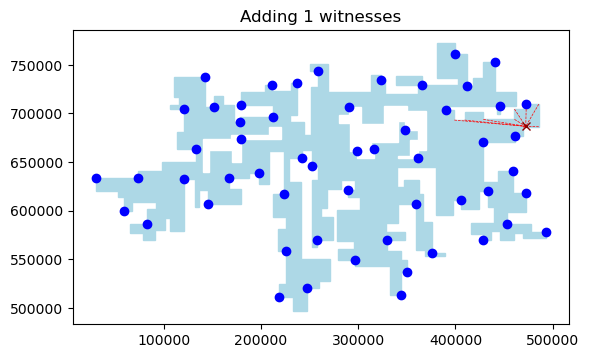

2023-11-22 15:05:05,705 Solving SAT-formula with timelimit 67.616582.
2023-11-22 15:05:05,706 SAT solver terminated (0.000000s).
2023-11-22 15:05:05,708 SAT-formula is satisfiable.
2023-11-22 15:05:05,708 Computing missing areas...


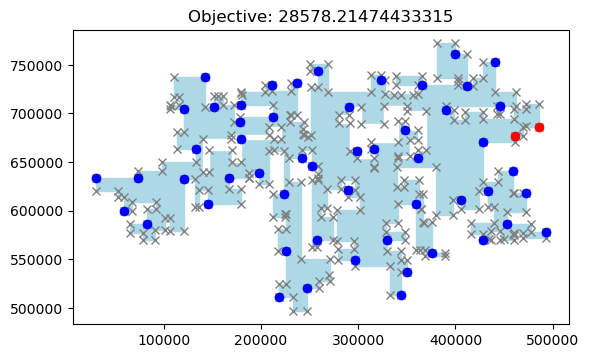

2023-11-22 15:05:07,605 Prohibited guard pair (47, 53).
2023-11-22 15:05:07,606 Prohibited guard pair (138, 272).
2023-11-22 15:05:07,607 Prohibited guard pair (0, 267).
2023-11-22 15:05:07,608 Prohibited guard pair (185, 213).
2023-11-22 15:05:07,609 Prohibited guard pair (177, 277).
2023-11-22 15:05:07,610 Prohibited guard pair (17, 43).
2023-11-22 15:05:07,611 Prohibited guard pair (178, 276).
2023-11-22 15:05:07,611 Prohibited guard pair (282, 311).
2023-11-22 15:05:07,612 Prohibited guard pair (58, 62).
2023-11-22 15:05:07,613 Prohibited guard pair (310, 311).
2023-11-22 15:05:07,613 Prohibited guard pair (144, 148).
2023-11-22 15:05:07,614 Prohibited guard pair (141, 168).
2023-11-22 15:05:07,615 Prohibited guard pair (83, 85).
2023-11-22 15:05:07,615 Prohibited guard pair (220, 222).
2023-11-22 15:05:07,617 Prohibited guard pair (303, 305).
2023-11-22 15:05:07,618 Prohibited guard pair (10, 14).
2023-11-22 15:05:07,619 Prohibited guard pair (254, 256).
2023-11-22 15:05:07,620 Pr

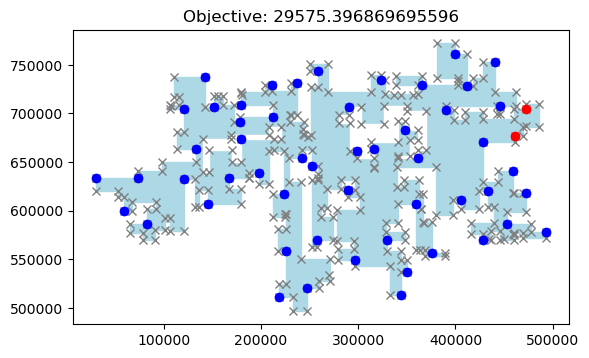

2023-11-22 15:05:09,548 Prohibited guard pair (247, 251).
2023-11-22 15:05:09,549 Prohibited guard pair (188, 192).
2023-11-22 15:05:09,551 Prohibited guard pair (69, 75).
2023-11-22 15:05:09,552 Prohibited guard pair (132, 136).
2023-11-22 15:05:09,553 Prohibited guard pair (260, 264).
2023-11-22 15:05:09,554 Prohibited guard pair (6, 283).
2023-11-22 15:05:09,554 Prohibited guard pair (108, 111).
2023-11-22 15:05:09,555 Prohibited guard pair (11, 15).
2023-11-22 15:05:09,556 Solving SAT-formula with timelimit 74.434730.
2023-11-22 15:05:09,558 SAT solver terminated (0.000000s).
2023-11-22 15:05:09,559 SAT-formula is satisfiable.
2023-11-22 15:05:09,559 Computing missing areas...


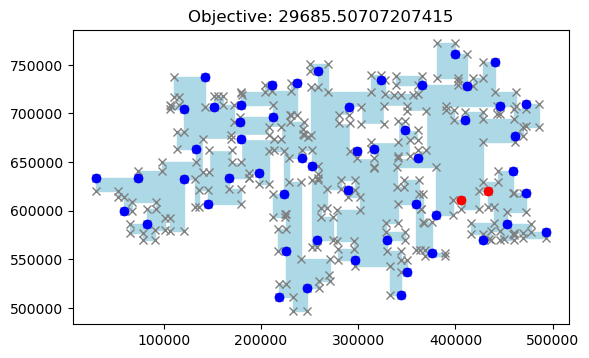

2023-11-22 15:05:12,122 Prohibited guard pair (216, 225).
2023-11-22 15:05:12,123 Prohibited guard pair (217, 224).
2023-11-22 15:05:12,124 Prohibited guard pair (223, 226).
2023-11-22 15:05:12,124 Prohibited guard pair (206, 207).
2023-11-22 15:05:12,125 Prohibited guard pair (5, 295).
2023-11-22 15:05:12,127 Prohibited guard pair (55, 59).
2023-11-22 15:05:12,127 Prohibited guard pair (289, 295).
2023-11-22 15:05:12,128 Prohibited guard pair (61, 82).
2023-11-22 15:05:12,129 Prohibited guard pair (16, 39).
2023-11-22 15:05:12,129 Prohibited guard pair (217, 228).
2023-11-22 15:05:12,130 Prohibited guard pair (26, 36).
2023-11-22 15:05:12,131 Prohibited guard pair (129, 132).
2023-11-22 15:05:12,131 Prohibited guard pair (198, 202).
2023-11-22 15:05:12,132 Solving SAT-formula with timelimit 77.010507.
2023-11-22 15:05:12,133 SAT solver terminated (0.000000s).
2023-11-22 15:05:12,134 SAT-formula is satisfiable.
2023-11-22 15:05:12,135 Computing missing areas...


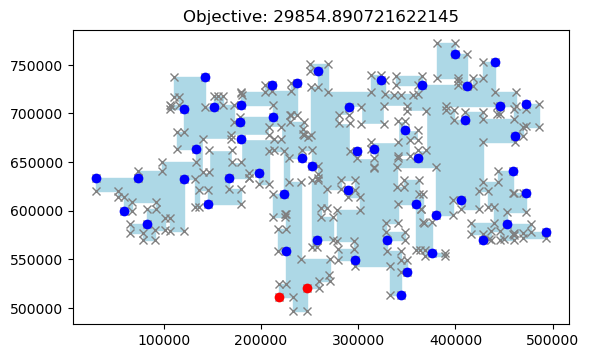

2023-11-22 15:05:13,861 Prohibited guard pair (179, 183).
2023-11-22 15:05:13,862 Prohibited guard pair (261, 266).
2023-11-22 15:05:13,863 Prohibited guard pair (260, 267).
2023-11-22 15:05:13,864 Prohibited guard pair (243, 244).
2023-11-22 15:05:13,864 Prohibited guard pair (121, 124).
2023-11-22 15:05:13,865 Prohibited guard pair (282, 286).
2023-11-22 15:05:13,866 Prohibited guard pair (71, 74).
2023-11-22 15:05:13,866 Prohibited guard pair (304, 306).
2023-11-22 15:05:13,867 Prohibited guard pair (196, 207).
2023-11-22 15:05:13,868 Prohibited guard pair (22, 26).
2023-11-22 15:05:13,869 Prohibited guard pair (229, 282).
2023-11-22 15:05:13,869 Prohibited guard pair (184, 281).
2023-11-22 15:05:13,870 Prohibited guard pair (260, 263).
2023-11-22 15:05:13,871 Prohibited guard pair (229, 312).
2023-11-22 15:05:13,872 Prohibited guard pair (284, 295).
2023-11-22 15:05:13,873 Prohibited guard pair (245, 247).
2023-11-22 15:05:13,873 Solving SAT-formula with timelimit 78.751905.
2023-1

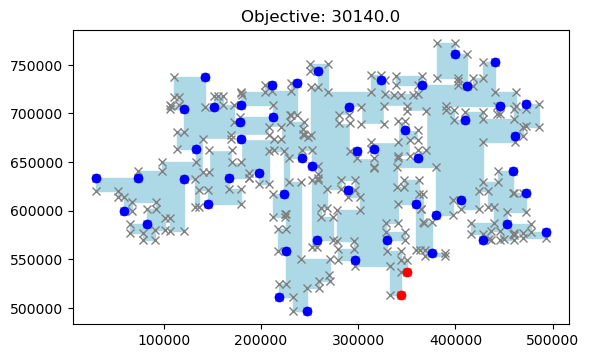

2023-11-22 15:05:15,676 Prohibited guard pair (20, 25).
2023-11-22 15:05:15,677 Prohibited guard pair (139, 169).
2023-11-22 15:05:15,678 Prohibited guard pair (252, 257).
2023-11-22 15:05:15,679 Prohibited guard pair (26, 30).
2023-11-22 15:05:15,680 Prohibited guard pair (22, 35).
2023-11-22 15:05:15,681 Solving SAT-formula with timelimit 80.559661.
2023-11-22 15:05:15,682 SAT solver terminated (0.000000s).
2023-11-22 15:05:15,683 SAT-formula is satisfiable.
2023-11-22 15:05:15,686 Computing missing areas...
2023-11-22 15:05:16,262 Adding witnesses to missing areas...
2023-11-22 15:05:16,267 Added coverage constraint for 12 vertices.
2023-11-22 15:05:16,271 Added coverage constraint for 11 vertices.
2023-11-22 15:05:16,274 Added coverage constraint for 11 vertices.


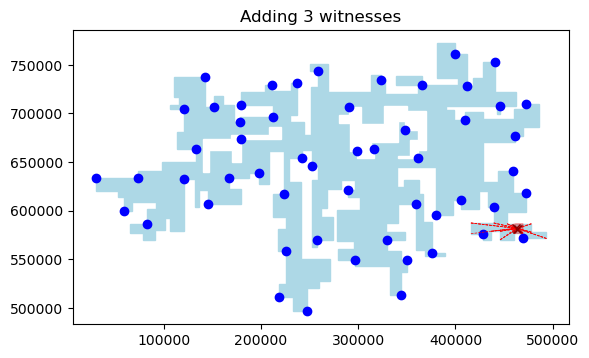

2023-11-22 15:05:17,203 Solving SAT-formula with timelimit 79.037484.
2023-11-22 15:05:17,205 SAT solver terminated (0.000000s).
2023-11-22 15:05:17,207 SAT-formula is satisfiable.
2023-11-22 15:05:17,208 Computing missing areas...


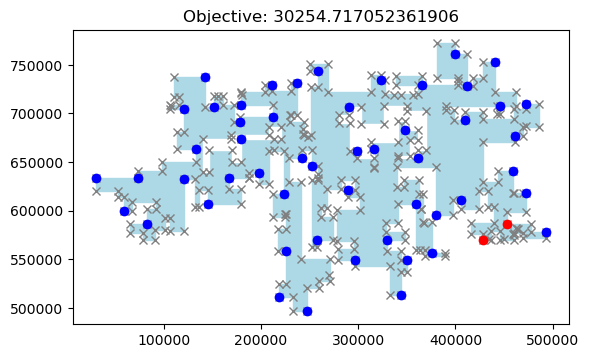

2023-11-22 15:05:19,645 Prohibited guard pair (253, 256).
2023-11-22 15:05:19,646 Prohibited guard pair (27, 36).
2023-11-22 15:05:19,647 Prohibited guard pair (77, 80).
2023-11-22 15:05:19,647 Prohibited guard pair (126, 135).
2023-11-22 15:05:19,648 Solving SAT-formula with timelimit 84.526687.
2023-11-22 15:05:19,649 SAT solver terminated (0.000000s).
2023-11-22 15:05:19,650 SAT-formula is satisfiable.
2023-11-22 15:05:19,652 Computing missing areas...


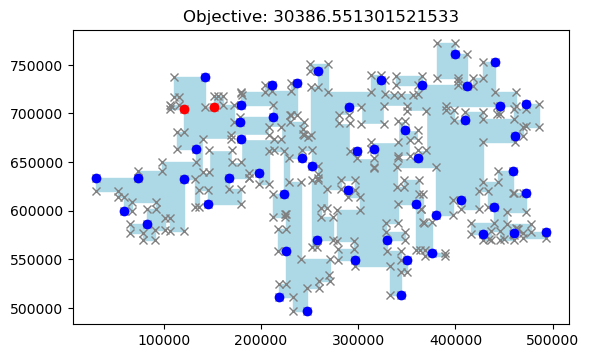

2023-11-22 15:05:21,220 Prohibited guard pair (157, 161).
2023-11-22 15:05:21,221 Prohibited guard pair (87, 300).
2023-11-22 15:05:21,221 Prohibited guard pair (89, 300).
2023-11-22 15:05:21,222 Prohibited guard pair (181, 277).
2023-11-22 15:05:21,222 Prohibited guard pair (229, 311).
2023-11-22 15:05:21,223 Prohibited guard pair (102, 309).
2023-11-22 15:05:21,224 Prohibited guard pair (105, 185).
2023-11-22 15:05:21,225 Prohibited guard pair (144, 153).
2023-11-22 15:05:21,225 Prohibited guard pair (251, 254).
2023-11-22 15:05:21,226 Prohibited guard pair (153, 163).
2023-11-22 15:05:21,227 Prohibited guard pair (89, 303).
2023-11-22 15:05:21,227 Prohibited guard pair (98, 101).
2023-11-22 15:05:21,228 Prohibited guard pair (119, 268).
2023-11-22 15:05:21,229 Prohibited guard pair (70, 73).
2023-11-22 15:05:21,230 Prohibited guard pair (44, 56).
2023-11-22 15:05:21,231 Prohibited guard pair (135, 137).
2023-11-22 15:05:21,231 Prohibited guard pair (202, 207).
2023-11-22 15:05:21,23

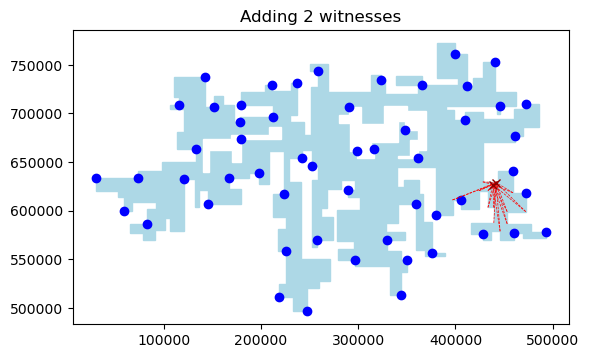

2023-11-22 15:05:22,456 Solving SAT-formula with timelimit 85.031341.
2023-11-22 15:05:22,458 SAT solver terminated (0.000000s).
2023-11-22 15:05:22,459 SAT-formula is satisfiable.
2023-11-22 15:05:22,460 Computing missing areas...


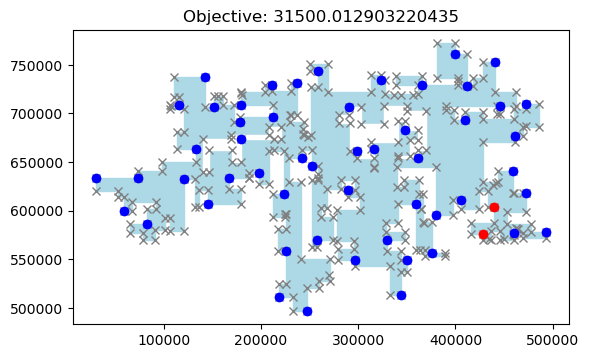

2023-11-22 15:05:24,114 Prohibited guard pair (143, 147).
2023-11-22 15:05:24,115 Prohibited guard pair (64, 68).
2023-11-22 15:05:24,116 Prohibited guard pair (35, 37).
2023-11-22 15:05:24,116 Prohibited guard pair (106, 111).
2023-11-22 15:05:24,117 Prohibited guard pair (199, 204).
2023-11-22 15:05:24,118 Prohibited guard pair (102, 280).
2023-11-22 15:05:24,118 Prohibited guard pair (228, 233).
2023-11-22 15:05:24,119 Prohibited guard pair (178, 181).
2023-11-22 15:05:24,120 Solving SAT-formula with timelimit 88.998363.
2023-11-22 15:05:24,121 SAT solver terminated (0.000000s).
2023-11-22 15:05:24,121 SAT-formula is satisfiable.
2023-11-22 15:05:24,122 Computing missing areas...


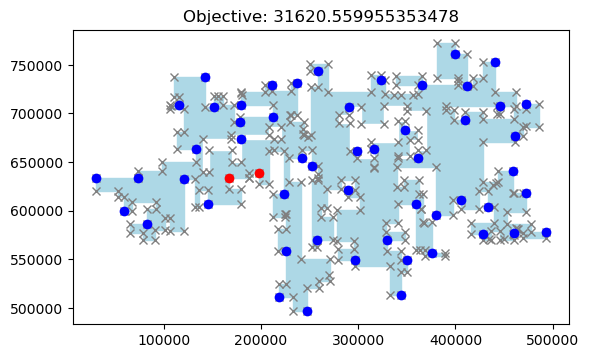

2023-11-22 15:05:25,617 Prohibited guard pair (285, 294).
2023-11-22 15:05:25,618 Prohibited guard pair (62, 81).
2023-11-22 15:05:25,620 Prohibited guard pair (105, 212).
2023-11-22 15:05:25,622 Prohibited guard pair (117, 269).
2023-11-22 15:05:25,623 Prohibited guard pair (6, 297).
2023-11-22 15:05:25,624 Prohibited guard pair (92, 302).
2023-11-22 15:05:25,625 Prohibited guard pair (95, 307).
2023-11-22 15:05:25,627 Prohibited guard pair (57, 61).
2023-11-22 15:05:25,628 Prohibited guard pair (109, 117).
2023-11-22 15:05:25,630 Prohibited guard pair (243, 245).
2023-11-22 15:05:25,632 Prohibited guard pair (18, 29).
2023-11-22 15:05:25,633 Prohibited guard pair (105, 110).
2023-11-22 15:05:25,634 Prohibited guard pair (159, 165).
2023-11-22 15:05:25,635 Prohibited guard pair (113, 115).
2023-11-22 15:05:25,636 Prohibited guard pair (229, 234).
2023-11-22 15:05:25,637 Prohibited guard pair (123, 270).
2023-11-22 15:05:25,639 Prohibited guard pair (213, 216).
2023-11-22 15:05:25,640 

Guards [8, 11, 16, 21, 28, 32, 38, 40, 46, 51, 58, 66, 70, 75, 77, 83, 91, 99, 108, 112, 116, 118, 120, 126, 128, 132, 139, 144, 145, 150, 156, 168, 174, 181, 186, 195, 198, 201, 211, 214, 220, 231, 241, 245, 248, 252, 259, 265, 276, 279, 283, 289, 296, 306, 312] Distance 32046.887936594394


In [6]:
import logging

#logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("DispAGP")
logger.setLevel(logging.DEBUG)

# time stamps
if not logger.hasHandlers():
    logging_handler = logging.StreamHandler()
    logging_handler.setFormatter(logging.Formatter("%(asctime)s %(message)s"))
    logger.addHandler(logging_handler)

logger.info("Test")

solver = DispAgpSolver(instance, logger=logger)
solver.observer = MyObserbver(instance, "example_iterations", "png")
solver.optimize()


print("Guards", solver.guards, "Distance", solver.objective)

In [7]:
solver.get_statistics()

[{'num_guards': 314,
  'objective': 1580.0,
  'feasible': True,
  'sat_stats': [{'num_guards': 41,
    'num_witnesses': 314,
    'num_prohibited_pairs': 0,
    'feasible': True,
    'sat_stats': {'restarts': 1,
     'conflicts': 0,
     'decisions': 275,
     'propagations': 315,
     'num_coverage_constraints': 314,
     'num_prohibited_guards': 0},
    'remaining_time': 899.5163269042969,
    'num_missing_areas': 10},
   {'num_guards': 49,
    'num_witnesses': 324,
    'num_prohibited_pairs': 0,
    'feasible': True,
    'sat_stats': {'restarts': 2,
     'conflicts': 0,
     'decisions': 547,
     'propagations': 630,
     'num_coverage_constraints': 324,
     'num_prohibited_guards': 0},
    'remaining_time': 898.3803458213806,
    'num_missing_areas': 2},
   {'num_guards': 51,
    'num_witnesses': 326,
    'num_prohibited_pairs': 0,
    'feasible': True,
    'sat_stats': {'restarts': 3,
     'conflicts': 0,
     'decisions': 820,
     'propagations': 945,
     'num_coverage_constra

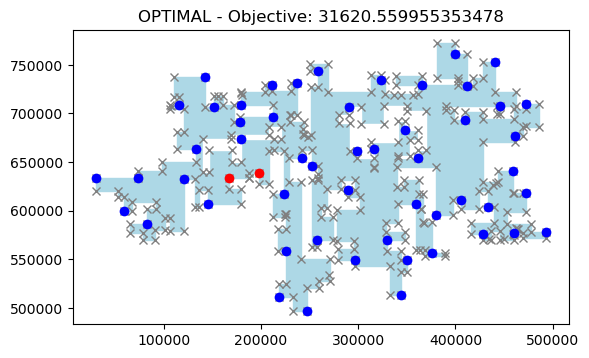

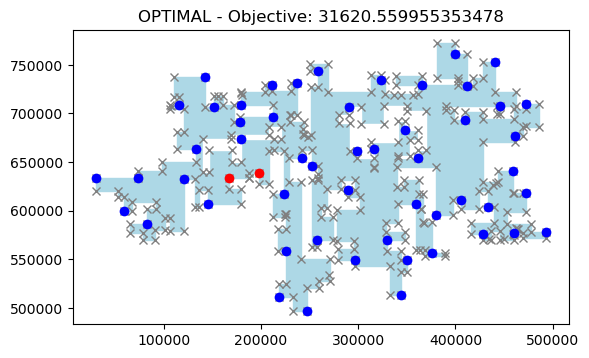

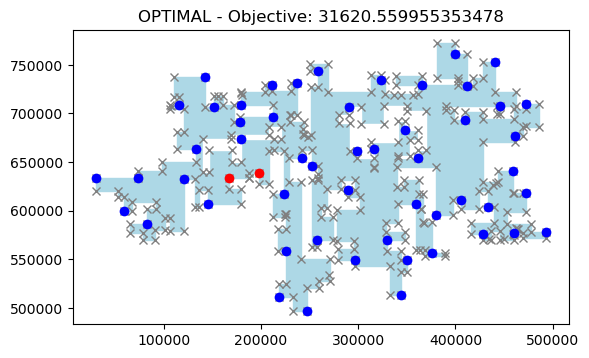

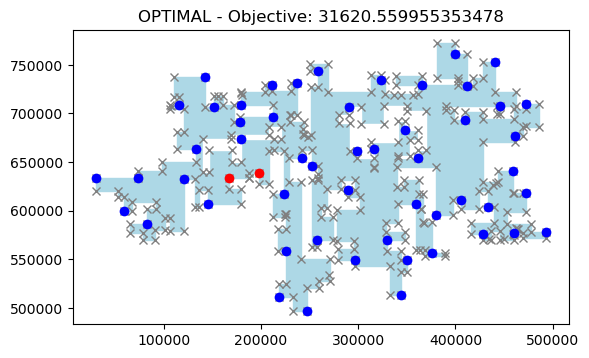

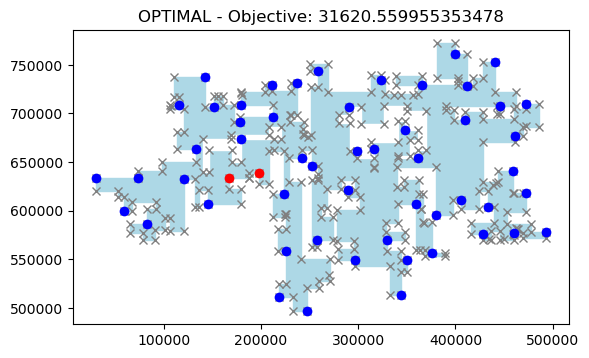

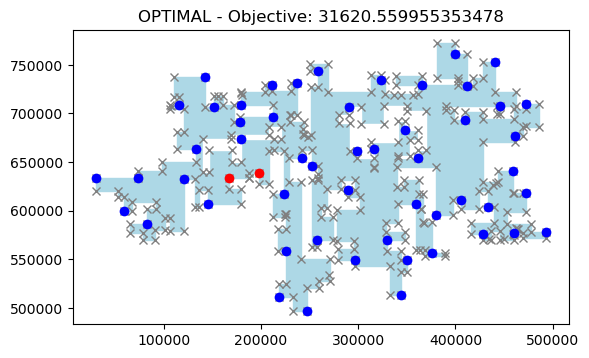

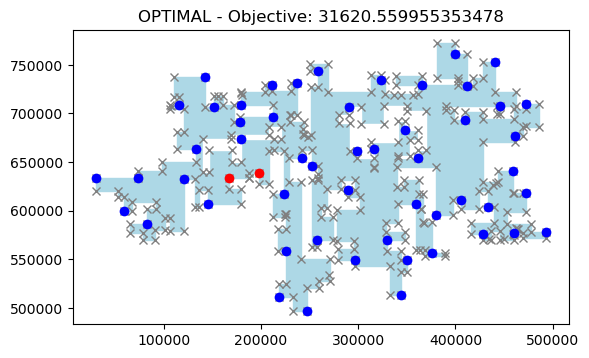

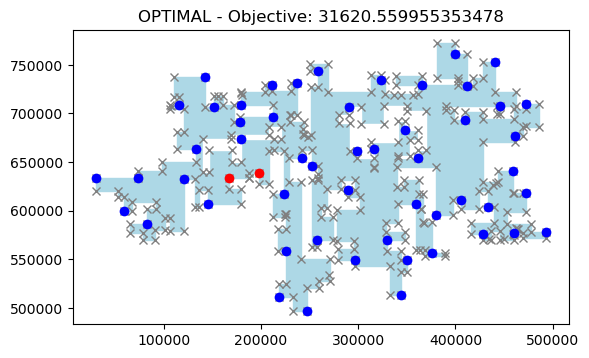

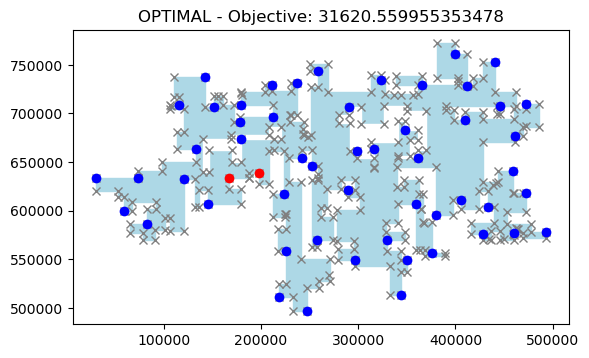

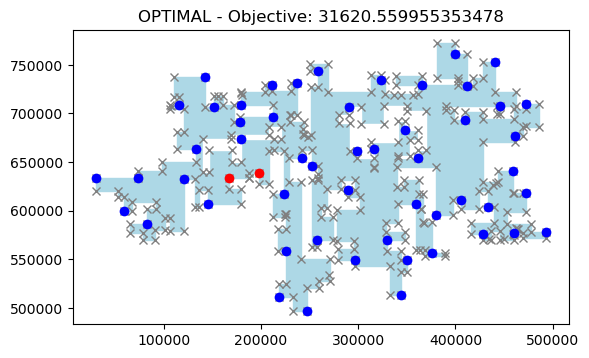

In [8]:
for i in range(10):
    solver.observer.plot_last_solution()